In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt 


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data=pd.read_csv("archive\GOOGL_2006-01-01_to_2018-01-01.csv")
data.drop(['Name','Open','High','Low'],inplace=True,axis=1)
data.set_index('Date',inplace=True)
data.index=pd.to_datetime(data.index)
data

,Close,Volume
Date,,
2006-01-03,217.83,13137450
2006-01-04,222.84,15292353
2006-01-05,225.85,10815661
2006-01-06,233.06,17759521
2006-01-09,233.68,12795837
...,...,...
2017-12-22,1068.86,889446
2017-12-26,1065.85,918767
2017-12-27,1060.20,1116203


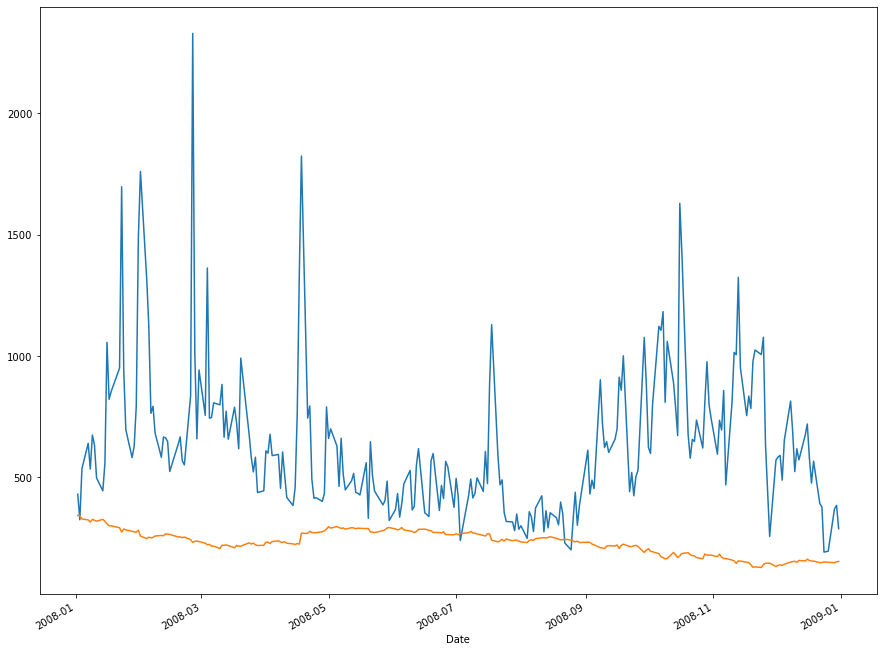

In [3]:
plt.figure( figsize=(15, 12))
data['Volume']['2008'].div(10000).plot()
data['Close']['2008'].plot()
plt.show()

In [4]:
tmp=(data['Close'][1:].values-data['Close'][0:-1].values)
tmp=np.insert(tmp,0,0)
tmp

array([ 0.  ,  5.01,  3.01, ..., -5.65, -4.25, -2.55])

In [5]:
data['Close_diff']=tmp
data=data[1:]

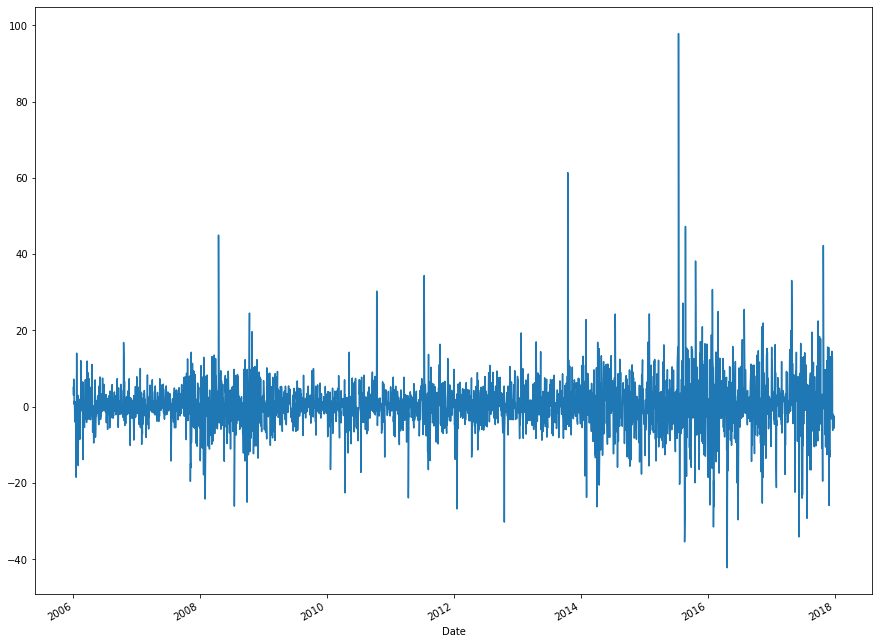

In [6]:
plt.figure( figsize=(15, 12))
data['Close_diff'].plot()
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3018 entries, 2006-01-04 to 2017-12-29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       3018 non-null   float64
 1   Volume      3018 non-null   int64  
 2   Close_diff  3018 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 94.3 KB


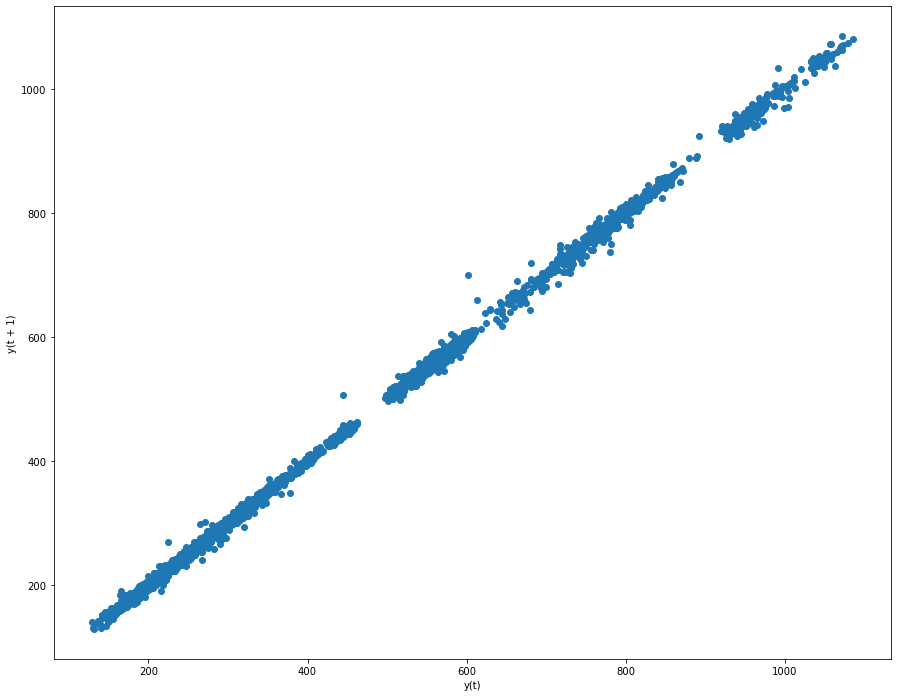

In [8]:
plt.figure( figsize=(15, 12))
pd.plotting.lag_plot(data['Close']);

In [9]:
data

,Close,Volume,Close_diff
Date,,,
2006-01-04,222.84,15292353,5.01
2006-01-05,225.85,10815661,3.01
2006-01-06,233.06,17759521,7.21
2006-01-09,233.68,12795837,0.62
2006-01-10,235.11,9104719,1.43
...,...,...,...
2017-12-22,1068.86,889446,-1.99
2017-12-26,1065.85,918767,-3.01
2017-12-27,1060.20,1116203,-5.65


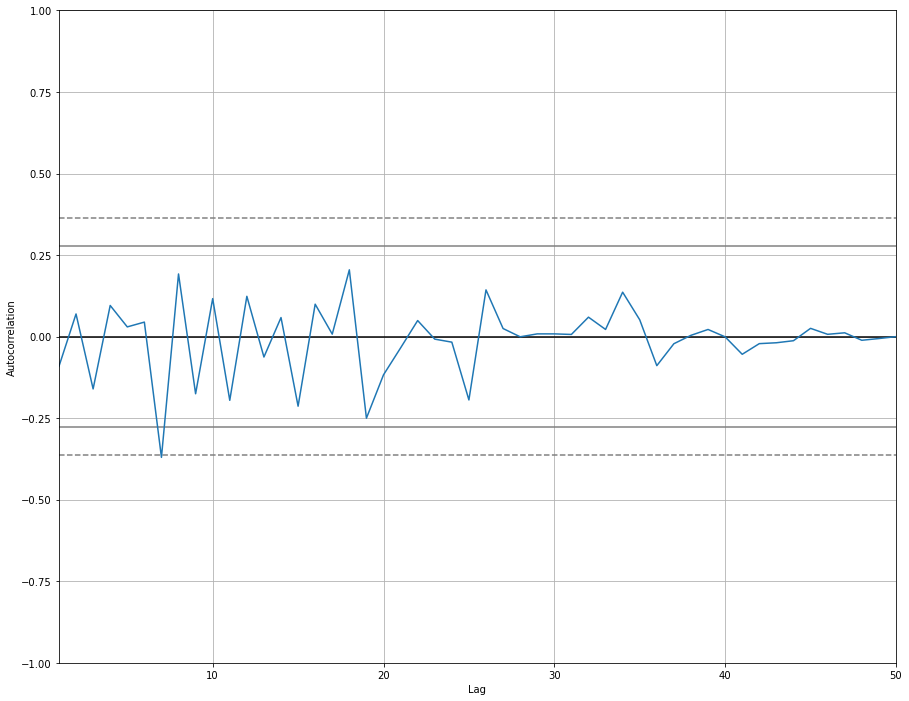

In [13]:
plt.figure( figsize=(15, 12))
pd.plotting.autocorrelation_plot(data['Close_diff'][:50]);

In [14]:
data_array=data['Close_diff'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_array = scaler.fit_transform(data_array)

In [15]:
train_size = int(len(data_array) * 0.75)
test_size = len(data_array) - train_size
train, test = data_array[0:train_size,:], data_array[train_size:len(data_array),:]
print(len(train), len(test))

2263 755


In [16]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [105]:
look_back = 300
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [106]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [107]:
from tensorflow.keras.layers import Dropout

In [108]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, input_shape=(1, look_back), return_sequences=False))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=350, batch_size=10, verbose=2)

Epoch 1/350
197/197 - 4s - loss: 0.0037
Epoch 2/350
197/197 - 0s - loss: 0.0019
Epoch 3/350
197/197 - 0s - loss: 0.0019
Epoch 4/350
197/197 - 0s - loss: 0.0018
Epoch 5/350
197/197 - 0s - loss: 0.0017
Epoch 6/350
197/197 - 0s - loss: 0.0017
Epoch 7/350
197/197 - 0s - loss: 0.0018
Epoch 8/350
197/197 - 0s - loss: 0.0017
Epoch 9/350
197/197 - 0s - loss: 0.0017
Epoch 10/350
197/197 - 0s - loss: 0.0017
Epoch 11/350
197/197 - 0s - loss: 0.0017
Epoch 12/350
197/197 - 0s - loss: 0.0017
Epoch 13/350
197/197 - 0s - loss: 0.0017
Epoch 14/350
197/197 - 0s - loss: 0.0017
Epoch 15/350
197/197 - 0s - loss: 0.0017
Epoch 16/350
197/197 - 0s - loss: 0.0017
Epoch 17/350
197/197 - 0s - loss: 0.0017
Epoch 18/350
197/197 - 0s - loss: 0.0017
Epoch 19/350
197/197 - 0s - loss: 0.0017
Epoch 20/350
197/197 - 0s - loss: 0.0017
Epoch 21/350
197/197 - 0s - loss: 0.0017
Epoch 22/350
197/197 - 0s - loss: 0.0017
Epoch 23/350
197/197 - 0s - loss: 0.0017
Epoch 24/350
197/197 - 0s - loss: 0.0017
Epoch 25/350
197/197 - 0s

In [109]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.92 RMSE
Test Score: 9.46 RMSE


In [110]:
testPredict = model.predict(testX)

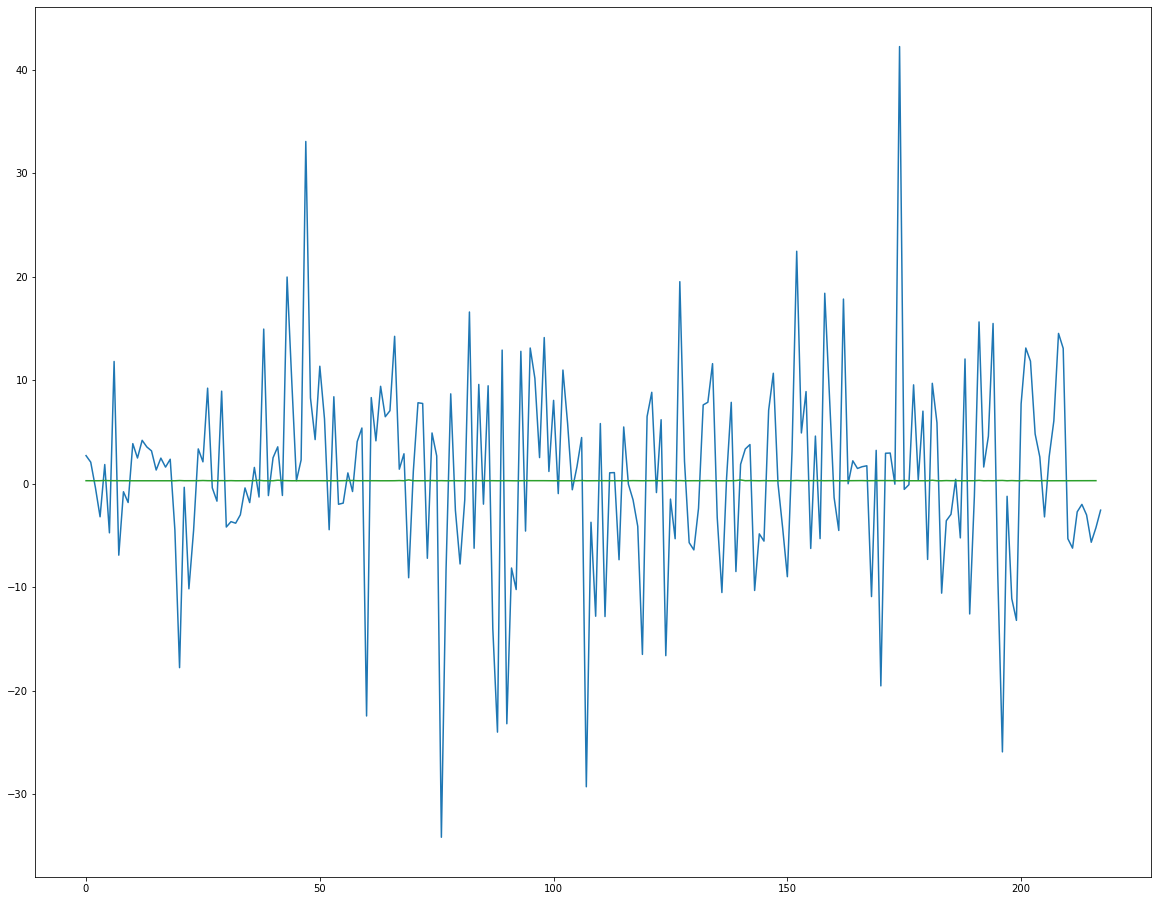

In [104]:
trainPredictPlot = np.empty_like(data_array)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(data_array)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_array)-1, :] = testPredict

plt.figure( figsize=(20, 16))
plt.plot(scaler.inverse_transform(data_array)[2800:])
plt.plot(trainPredictPlot[2800:])
plt.plot(testPredictPlot[2800:])
plt.show()

In [35]:
testPredict.shape

(744, 1)

In [18]:
look_back=4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [20]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(30):
 model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()

2258/2258 - 6s - loss: 0.0014
2258/2258 - 4s - loss: 0.0012
2258/2258 - 4s - loss: 0.0012
2258/2258 - 4s - loss: 0.0012
2258/2258 - 4s - loss: 0.0012
2258/2258 - 4s - loss: 0.0012
2258/2258 - 4s - loss: 0.0012
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 5s - loss: 0.0011
2258/2258 - 5s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 5s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 5s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011
2258/2258 - 4s - loss: 0.0011


In [22]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [23]:
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.83 RMSE
Test Score: 9.70 RMSE


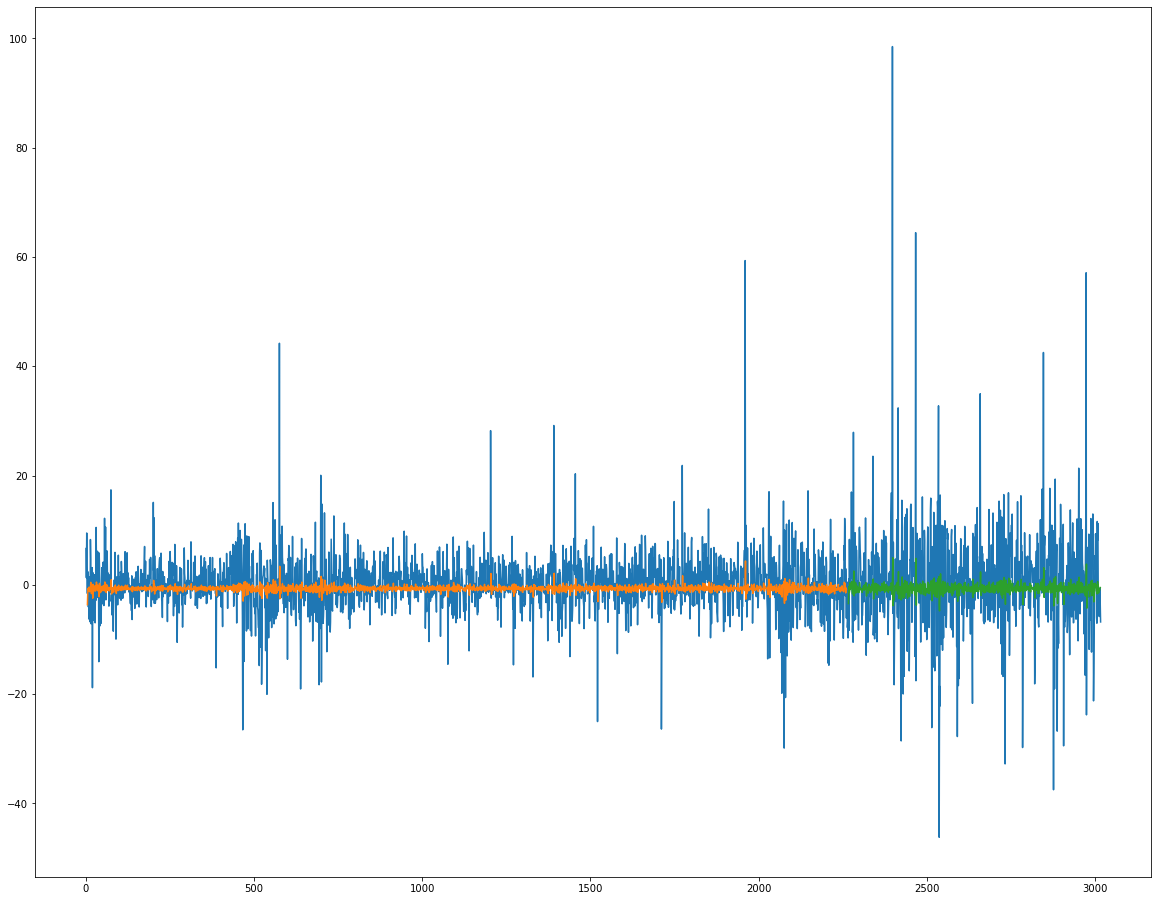

In [24]:
trainPredictPlot = np.empty_like(data_array)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(data_array)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_array)-1, :] = testPredict

plt.figure( figsize=(20, 16))
plt.plot(scaler.inverse_transform(data_array))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()